#### Climate research and weather analysis
To find out weather patterns and correlation between melting glaciers and rising temperatures between 1990 and 2022
<br><br> 
- Explore weather data from 5 cities in each hemisphere:
  - Northern Hemisphere
    - New York
    - Munich
    - Istanbul
    - Dubai
    - Tokyo
  - Equator
    - Bogotá
    - Brasília
    - Nairobi
    - Malé
    - Jakarta
  - Southern Hemisphere
    - Maputo
    - Antananarivo
    - Cape Town
    - Sydney
    - Auckland
- Analyze yearly and monthly avg, min, max temps and rainfall.
- Analyze melting glacier rate in north pole (Arctic) and south pole (Antarctica)
- Analyze CO2 levels and vegetation degradation impact
- Analyze human/animal fatalities by environmental causes

<br> Disclaimer: The research is on-going and will be updated periodically


 

In [6]:
pip install intake_esm

  Obtaining dependency information for intake_esm from https://files.pythonhosted.org/packages/c2/03/5fa2b57c21beba701b20a9a8b6b56c341c02b54dd40348bacd9e27abc4d0/intake_esm-2023.11.10-py3-none-any.whl.metadata
  Using cached intake_esm-2023.11.10-py3-none-any.whl.metadata (7.2 kB)
  Obtaining dependency information for pydantic>=2.0 from https://files.pythonhosted.org/packages/dd/b7/9aea7ee6c01fe3f3c03b8ca3c7797c866df5fecece9d6cb27caa138db2e2/pydantic-2.5.3-py3-none-any.whl.metadata
  Using cached pydantic-2.5.3-py3-none-any.whl.metadata (65 kB)
  Obtaining dependency information for bokeh>=2.4.2 from https://files.pythonhosted.org/packages/8f/96/3168eb2dd94fd62ef2b9d06456344754c5a09bb7fa0af917b4d6f27e1a2c/bokeh-3.3.2-py3-none-any.whl.metadata
  Using cached bokeh-3.3.2-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for distributed==2023.12.1 from https://files.pythonhosted.org/packages/96/b0/547d4ef38afea651d10c79961c275df4a55ffbaf846d79ea165aeffb669f/distributed

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\dask-scheduler.exe' -> 'c:\\Python312\\Scripts\\dask-scheduler.exe.deleteme'


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
#importing libraries
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily, Stations, Normals
import seaborn as sbn
import intake
import intake_esm
import xarray as xr
import warnings

warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'intake_esm'

In [6]:
# Set time period
start = datetime(1990, 1, 1)
end = datetime(2022, 12, 31)

##The points are latitude and longitude, the MeteoStat API automatically uses Nearest Neighbour to fetch data from closest weather station to the lat & lon points provided

#Northern Hemisphere
#New York
new_york_location = Point(40.712776, -74.005974)
#Munich
munich_location = Point(48.135124, 11.581981)
#Istanbul
istanbul_location = Point(41.008240, 28.978359)
#Dubai
dubai_location = Point(25.276987, 55.296249)
#Tokyo
tokyo_location = Point(35.652832, 139.839478)

#Equator
#Bogotá
bogota_location = Point(4.624335, -74.063644)
#Rio de Janeiro
rio_de_janeiro_location = Point(-22.970722, -43.182365)
#Nairobi
nairobi_location = Point(-1.362863, 36.834583)
#Malé
male_location = Point(1.924992, 73.399658)
#Jakarta
jakarta_location = Point(-6.121435, 106.774124)

#Southern Hemisphere
#Maputo
maputo_location = Point(-25.953724, 32.588711)
#Antananarivo
antananarivo_location = Point(-18.879190, 47.507905)
#Cape Town
cape_town_location = Point(-34.254570, 18.406263)
#Sydney
sydney_location = Point(-33.870453, 151.208755)
#Auckland
auckland_location = Point(-36.850109, 174.767700)

In [7]:
# Get nearby weather stations using the points
stations = Stations()
stations = stations.nearby(40.712776, -74.005974)
station = stations.fetch(1)

# Print DataFrame
print(station)


                         name country region   wmo  icao  latitude  longitude  \
id                                                                              
KJRB0  New York / Wall Street      US     NY  <NA>  KJRB   40.7012    -74.009   

       elevation          timezone hourly_start hourly_end daily_start  \
id                                                                       
KJRB0        2.0  America/New_York   2016-07-20 2023-12-29  2016-07-21   

       daily_end monthly_start monthly_end     distance  
id                                                       
KJRB0 2022-04-24    2019-01-01  2021-01-01  1312.220903  


In [8]:
#Northern Hemisphere
new_york_data = Daily(new_york_location, start, end)
new_york_data = new_york_data.fetch()
df_new_york = pd.DataFrame(new_york_data)
ny_location = 'new_york'
df_new_york['location'] = ny_location

munich_data = Daily(munich_location, start, end)
munich_data = munich_data.fetch()
df_munich = pd.DataFrame(munich_data)
mu_location = 'munich'
df_munich['location'] = mu_location

istanbul_data = Daily(istanbul_location, start, end)
istanbul_data = istanbul_data.fetch()
df_istanbul = pd.DataFrame(istanbul_data)
ist_location = 'istanbul'
df_istanbul['location'] = ist_location

dubai_data = Daily(dubai_location, start, end)
dubai_data = dubai_data.fetch()
df_dubai = pd.DataFrame(dubai_data)
dub_location = 'dubai'
df_dubai['location'] = dub_location

tokyo_data = Daily(tokyo_location, start, end)
tokyo_data = tokyo_data.fetch()
df_tokyo = pd.DataFrame(tokyo_data)
tok_location = 'tokyo'
df_tokyo['location'] = tok_location

#Equator
bogota_data = Daily(bogota_location, start, end)
bogota_data = bogota_data.fetch()
df_bogota = pd.DataFrame(bogota_data)
bog_location = 'bogota'
df_bogota['location'] = bog_location

rio_data = Daily(rio_de_janeiro_location, start, end)
rio_data = rio_data.fetch()
df_rio = pd.DataFrame(rio_data)
rio_location = 'rio_de_janeiro'
df_rio['location'] = rio_location

nairobi_data = Daily(nairobi_location, start, end)
nairobi_data = nairobi_data.fetch()
df_nairobi = pd.DataFrame(nairobi_data)
nai_location = 'nairobi'
df_nairobi['location'] = nai_location

male_data = Daily(male_location, start, end)
male_data = male_data.fetch()
df_male = pd.DataFrame(male_data)
male_location = 'male'
df_male['location'] = male_location

jakarta_data = Daily(jakarta_location, start, end)
jakarta_data = jakarta_data.fetch()
df_jakarta = pd.DataFrame(jakarta_data)
jak_location = 'jakarata'
df_jakarta['location'] = jak_location

#Southern Hemisphere
maputo_data = Daily(maputo_location, start, end)
maputo_data = maputo_data.fetch()
df_maputo = pd.DataFrame(maputo_data)
mapu_location = 'maputo'
df_maputo['location'] = mapu_location

ant_data = Daily(antananarivo_location, start, end)
ant_data = ant_data.fetch()
df_ant = pd.DataFrame(ant_data)
ant_location = 'antananarivo'
df_ant['location'] = ant_location

cape_data = Daily(cape_town_location, start, end)
cape_data = cape_data.fetch()
df_cape = pd.DataFrame(cape_data)
cape_location = 'cape_town'
df_cape['location'] = cape_location

sydney_data = Daily(sydney_location, start, end)
sydney_data = sydney_data.fetch()
df_sydney = pd.DataFrame(sydney_data)
syd_location = 'sydney'
df_sydney['location'] = syd_location

auckland_data = Daily(auckland_location, start, end)
auckland_data = auckland_data.fetch()
df_auckland = pd.DataFrame(auckland_data)
auck_location = 'auckland'
df_auckland['location'] = auck_location



In [9]:
##Add hemisphere field where loc is ....
dframes_uncon = [df_new_york, df_munich, df_istanbul, df_dubai, df_tokyo,
                 ##
                 df_bogota, df_rio, df_nairobi, df_male, df_jakarta,
                 ##
                 df_maputo, df_ant, df_cape, df_sydney, df_auckland]
dframes = pd.concat(dframes_uncon)

In [10]:
dframes.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location
time,,,,,,,,,,,
1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york
1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york
1990-01-03,3.9,-1.7,10.0,0.0,0.0,231.0,11.2,24.1,1026.0,NaN,new_york
1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york
1990-01-05,6.2,2.2,9.4,0.0,0.0,297.0,15.8,46.4,1018.9,NaN,new_york


In [11]:
city = dframes['location'].unique()

In [12]:
city

array(['new_york', 'munich', 'istanbul', 'dubai', 'tokyo', 'bogota',
       'rio_de_janeiro', 'nairobi', 'male', 'jakarata', 'maputo',
       'antananarivo', 'cape_town', 'sydney', 'auckland'], dtype=object)

In [13]:
dframes['hemisphere'] = 'equator'

In [14]:
dframes.loc[(dframes['location'] == 'new_york') | (dframes['location'] == 'munich') | (dframes['location'] == 'istanbul') | (dframes['location'] == 'dubai') | (dframes['location'] == 'tokyo'), 'hemisphere'] = 'northern_hemisphere'
#Equator is already added
dframes.loc[(dframes['location'] == 'maputo') |(dframes['location'] == 'cape_town') |(dframes['location'] == 'antananarivo') | (dframes['location'] == 'sydney') | (dframes['location'] == 'auckland'), 'hemisphere'] = 'southern_hemisphere'  

In [15]:
dframes

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location,hemisphere
time,,,,,,,,,,,,
1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york,northern_hemisphere
1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york,northern_hemisphere
1990-01-03,3.9,-1.7,10.0,0.0,0.0,231.0,11.2,24.1,1026.0,NaN,new_york,northern_hemisphere
1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york,northern_hemisphere
1990-01-05,6.2,2.2,9.4,0.0,0.0,297.0,15.8,46.4,1018.9,NaN,new_york,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,19.3,15.7,23.2,2.9,NaN,136.0,7.1,NaN,1019.1,NaN,auckland,southern_hemisphere
2022-12-28,19.9,15.8,23.8,0.0,NaN,67.0,9.2,NaN,1021.5,NaN,auckland,southern_hemisphere
2022-12-29,19.3,16.0,22.1,3.1,NaN,8.0,7.7,NaN,1023.6,NaN,auckland,southern_hemisphere


In [16]:
dframes.reset_index(inplace=True)

In [17]:
dframes

,time,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location,hemisphere
0,1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york,northern_hemisphere
1,1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york,northern_hemisphere
2,1990-01-03,3.9,-1.7,10.0,0.0,0.0,231.0,11.2,24.1,1026.0,NaN,new_york,northern_hemisphere
3,1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york,northern_hemisphere
4,1990-01-05,6.2,2.2,9.4,0.0,0.0,297.0,15.8,46.4,1018.9,NaN,new_york,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159025,2022-12-27,19.3,15.7,23.2,2.9,NaN,136.0,7.1,NaN,1019.1,NaN,auckland,southern_hemisphere
159026,2022-12-28,19.9,15.8,23.8,0.0,NaN,67.0,9.2,NaN,1021.5,NaN,auckland,southern_hemisphere
159027,2022-12-29,19.3,16.0,22.1,3.1,NaN,8.0,7.7,NaN,1023.6,NaN,auckland,southern_hemisphere
159028,2022-12-30,19.4,16.9,22.2,0.0,NaN,222.0,14.4,NaN,1019.5,NaN,auckland,southern_hemisphere


In [18]:
df = dframes.rename(columns={'time': 'date'})

In [19]:
df.shape

(159030, 13)

In [20]:
df.describe()

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,159030,152955.000000,143567.000000,144390.000000,98951.000000,23996.000000,71304.000000,99586.000000,14423.000000,58844.000000,12843.000000
mean,2006-09-19 17:23:28.081494272,18.961522,14.550325,23.376255,3.332494,7.238873,174.520686,12.934971,34.891312,1015.813718,287.315191
min,1990-01-01 00:00:00,-17.800000,-18.900000,-13.300000,0.000000,0.000000,0.000000,0.000000,3.600000,933.800000,0.000000
25%,1998-05-18 00:00:00,14.000000,9.500000,18.600000,0.000000,0.000000,73.000000,8.700000,24.100000,1011.000000,12.000000
50%,2006-10-01 00:00:00,19.500000,14.800000,24.000000,0.000000,0.000000,184.000000,11.500000,31.300000,1015.800000,222.000000
75%,2015-02-14 00:00:00,24.300000,20.200000,29.000000,2.000000,0.000000,265.000000,15.700000,42.500000,1020.600000,510.000000
max,2022-12-31 00:00:00,41.900000,38.000000,49.000000,450.100000,1039.000000,360.000000,76.500000,124.600000,1044.900000,942.000000
std,NaN,7.677742,7.830305,8.357006,10.351346,35.248376,107.140751,6.304705,15.294441,7.384456,273.292995


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159030 entries, 0 to 159029
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        159030 non-null  datetime64[ns]
 1   tavg        152955 non-null  float64       
 2   tmin        143567 non-null  float64       
 3   tmax        144390 non-null  float64       
 4   prcp        98951 non-null   float64       
 5   snow        23996 non-null   float64       
 6   wdir        71304 non-null   float64       
 7   wspd        99586 non-null   float64       
 8   wpgt        14423 non-null   float64       
 9   pres        58844 non-null   float64       
 10  tsun        12843 non-null   float64       
 11  location    159030 non-null  object        
 12  hemisphere  159030 non-null  object        
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 15.8+ MB


EDA

In [22]:
df.corr(numeric_only=True)

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
tavg,1.000000,0.965807,0.970512,0.000956,-0.305637,-0.163102,-0.078700,0.048275,-0.375598,0.461954
tmin,0.965807,1.000000,0.909366,0.033302,-0.304596,-0.164007,-0.039611,0.057884,-0.392934,0.294671
tmax,0.970512,0.909366,1.000000,-0.026314,-0.300435,-0.157917,-0.112689,0.043752,-0.352371,0.560040
prcp,0.000956,0.033302,-0.026314,1.000000,0.002424,-0.002189,0.063969,0.229388,-0.170493,-0.206798
snow,-0.305637,-0.304596,-0.300435,0.002424,1.000000,0.021029,0.044348,-0.017661,0.032339,-0.131436
wdir,-0.163102,-0.164007,-0.157917,-0.002189,0.021029,1.000000,0.057519,0.260118,-0.078253,-0.207547
wspd,-0.078700,-0.039611,-0.112689,0.063969,0.044348,0.057519,1.000000,0.775398,-0.116178,-0.276023
wpgt,0.048275,0.057884,0.043752,0.229388,-0.017661,0.260118,0.775398,1.000000,-0.285889,-0.121828
pres,-0.375598,-0.392934,-0.352371,-0.170493,0.032339,-0.078253,-0.116178,-0.285889,1.000000,0.073791
tsun,0.461954,0.294671,0.560040,-0.206798,-0.131436,-0.207547,-0.276023,-0.121828,0.073791,1.000000


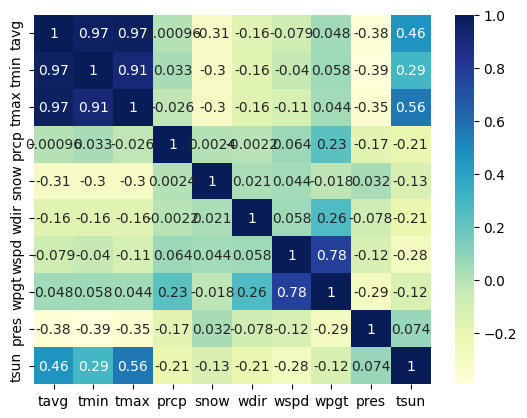

In [23]:
dataplot = sbn.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

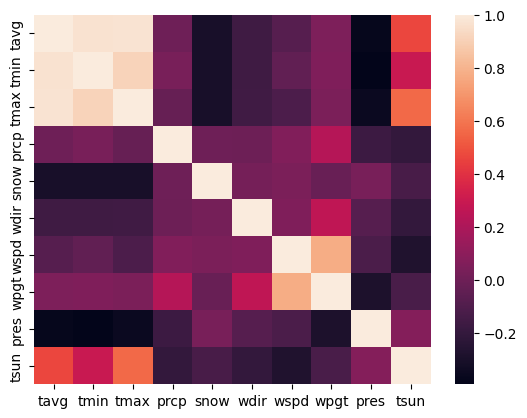

In [24]:
dataplot=sbn.heatmap(df.corr(numeric_only=True))
plt.show()

In [25]:
duplicate_rows = df[df.duplicated()]
print("duplicate rows: ", duplicate_rows.shape)

duplicate rows:  (0, 13)


In [26]:
#total rows 159030 
print(df.isnull().sum())

date               0
tavg            6075
tmin           15463
tmax           14640
prcp           60079
snow          135034
wdir           87726
wspd           59444
wpgt          144607
pres          100186
tsun          146187
location           0
hemisphere         0
dtype: int64


<Axes: xlabel='tavg'>

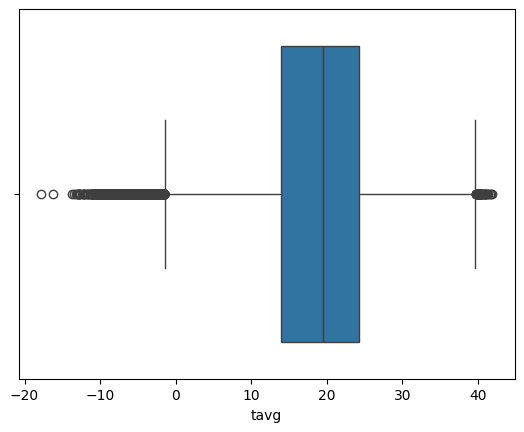

In [27]:
sbn.boxplot(x=df['tavg'])

<Axes: xlabel='tmin'>

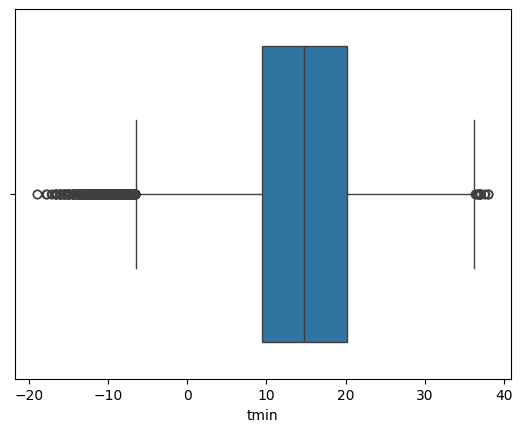

In [28]:
sbn.boxplot(x=df['tmin'])

<Axes: xlabel='tmax'>

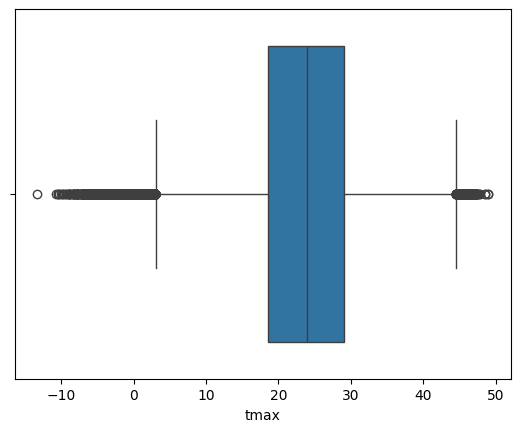

In [29]:
sbn.boxplot(x=df['tmax'])

<Axes: xlabel='prcp'>

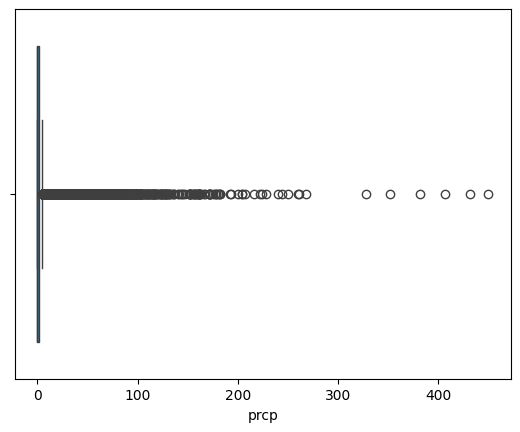

In [30]:
sbn.boxplot(x=df['prcp'])

<Axes: xlabel='tsun'>

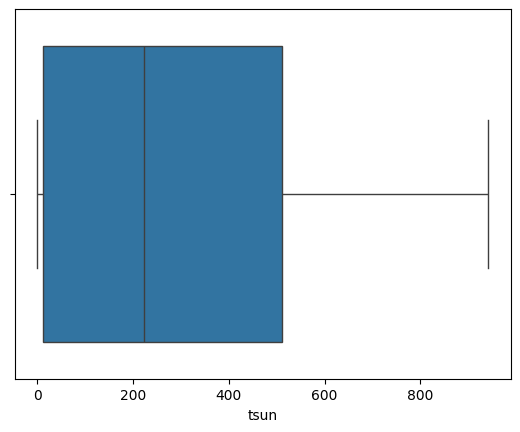

In [31]:
sbn.boxplot(x=df['tsun'])

In [32]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
print(IQR)

tavg     10.3
tmin     10.7
tmax     10.4
prcp      2.0
snow      0.0
wdir    192.0
wspd      7.0
wpgt     18.4
pres      9.6
tsun    498.0
dtype: float64


Text(0.5, 0, 'Cities')

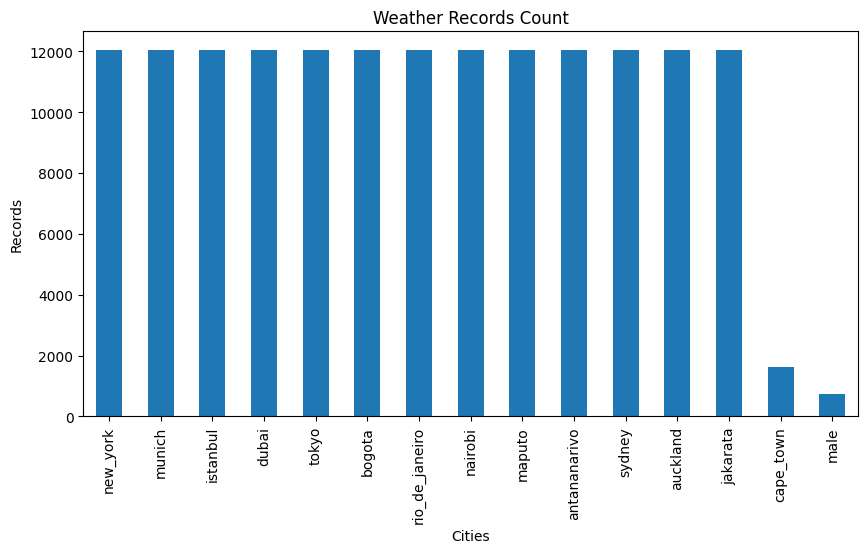

In [33]:
df.location.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Weather Records Count")
plt.ylabel('Records')
plt.xlabel('Cities')

Cape Town's and Male's records are not captured completely

In [34]:
df.loc[(df['location'] == 'cape_town'), 'date'].min()

Timestamp('2018-07-21 00:00:00')

In [35]:
df.loc[(df['location'] == 'male'), 'date'].min()

Timestamp('2021-01-02 00:00:00')

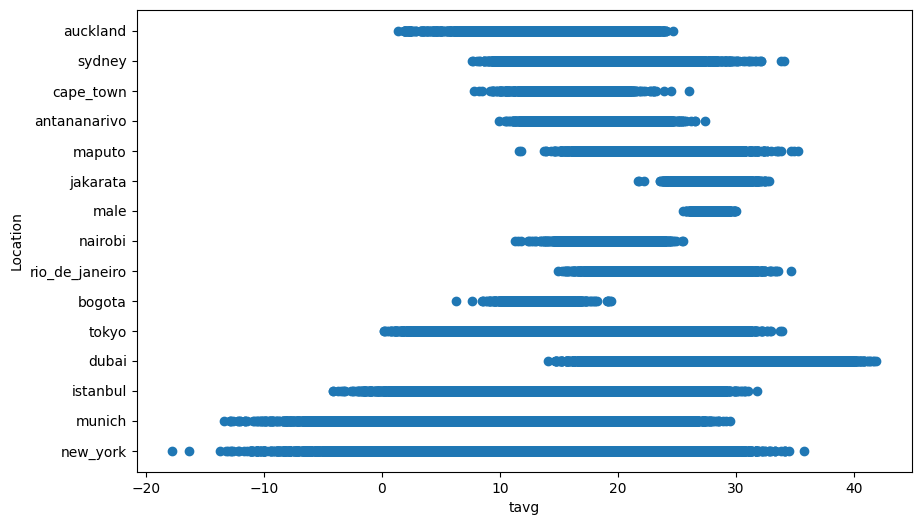

In [36]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['tavg'], df['location'])
ax.set_xlabel('tavg')
ax.set_ylabel('Location')
plt.show()

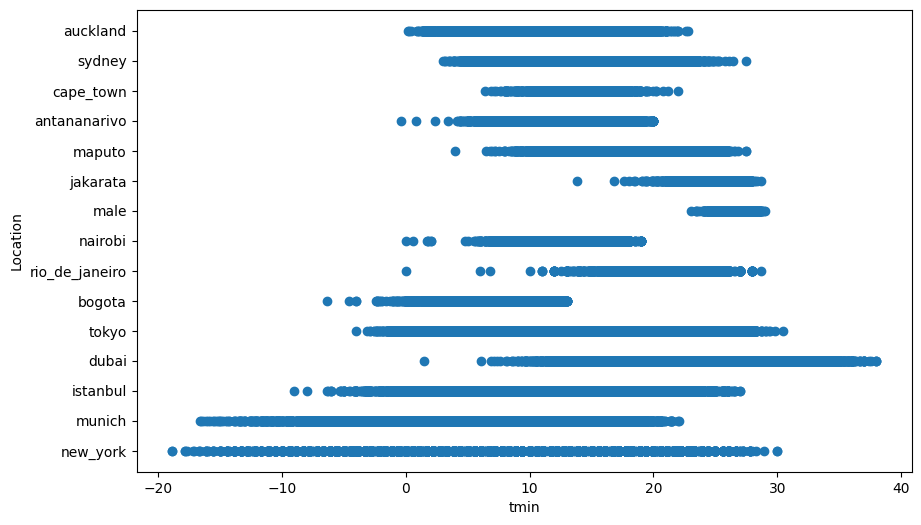

In [37]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['tmin'], df['location'])
ax.set_xlabel('tmin')
ax.set_ylabel('Location')
plt.show()

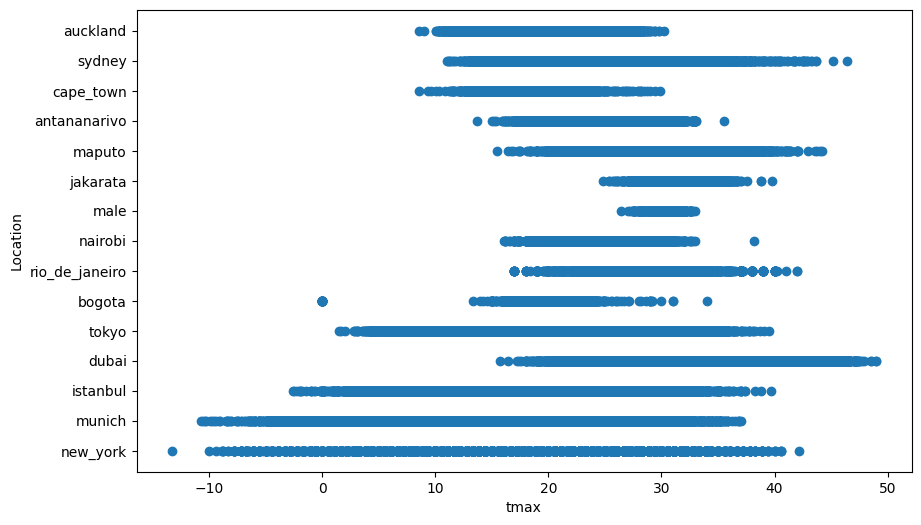

In [38]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['tmax'], df['location'])
ax.set_xlabel('tmax')
ax.set_ylabel('Location')
plt.show()

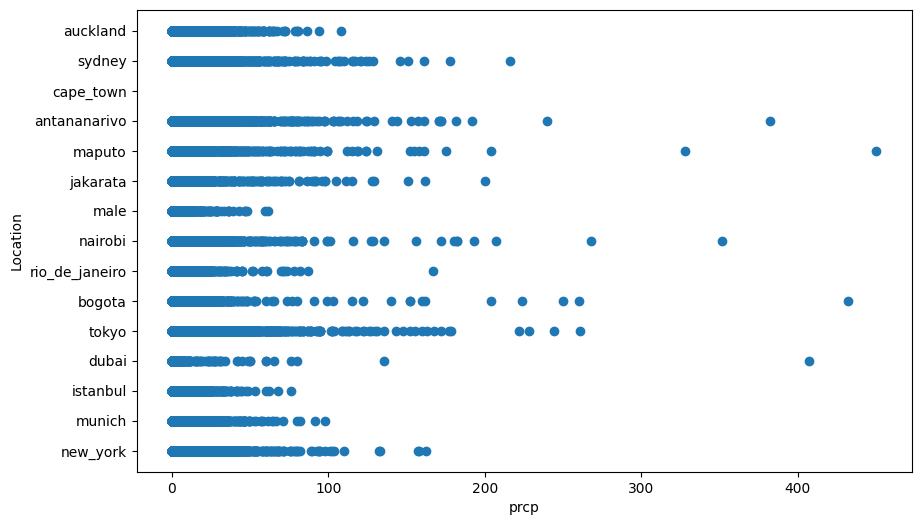

In [39]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['prcp'], df['location'])
ax.set_xlabel('prcp')
ax.set_ylabel('Location')
plt.show()

Percipitation data is not accurate or atleast cannot be validated, so we will either have to change the source or disregard it

In [40]:
year = df['date'].dt.year

hemi_year_agg = df.groupby([year, df['hemisphere']]).agg({'tavg': ['mean', 'min', 'max']})
hemi_year_agg.columns = ['tavg_mean', 'tavg_min_mean', 'tavg_max_mean']
hemi_year_agg = hemi_year_agg.reset_index()
print(hemi_year_agg)

    date           hemisphere  tavg_mean  tavg_min_mean  tavg_max_mean
0   1990              equator  20.197200           10.6           32.9
1   1990  northern_hemisphere  16.944015           -8.5           38.7
2   1990  southern_hemisphere  18.809656            7.6           30.8
3   1991              equator  19.560289            9.1           31.7
4   1991  northern_hemisphere  16.141752          -12.2           37.9
..   ...                  ...        ...            ...            ...
94  2021  northern_hemisphere  17.227945           -7.9           40.1
95  2021  southern_hemisphere  18.135671            7.3           30.6
96  2022              equator  22.664783           11.1           30.9
97  2022  northern_hemisphere  17.302247          -10.7           40.0
98  2022  southern_hemisphere  18.270215            8.6           29.3

[99 rows x 5 columns]


In [41]:
northHemi = hemi_year_agg.where(hemi_year_agg['hemisphere'] == 'northern_hemisphere').dropna()
equatorHemi = hemi_year_agg.where(hemi_year_agg['hemisphere'] == 'equator').dropna()
southernHemi = hemi_year_agg.where(hemi_year_agg['hemisphere'] == 'southern_hemisphere').dropna()

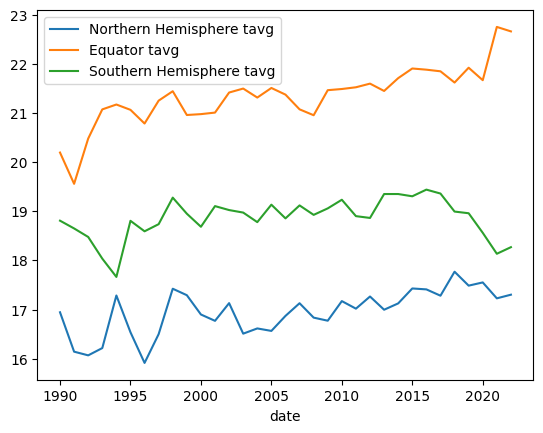

In [42]:
ax = northHemi.plot(x='date', y='tavg_mean', label = 'Northern Hemisphere tavg')
bx = equatorHemi.plot(ax=ax, x='date', y='tavg_mean', label = 'Equator tavg')
cx = southernHemi.plot(ax=bx, x='date', y='tavg_mean', label = 'Southern Hemisphere tavg')

plt.show()

Year on year temperature increase - delta

In [43]:
#(2022 - 2021)/2021 -> Percent Delta
#2021
temp_2021_northern_hemisphere = hemi_year_agg.loc[(hemi_year_agg["date"] == 2021) & (hemi_year_agg["hemisphere"] == 'northern_hemisphere'),['tavg_mean']].values[0]
print(temp_2021_northern_hemisphere)
temp_2021_southern_hemisphere = hemi_year_agg.loc[(hemi_year_agg["date"] == 2021) & (hemi_year_agg["hemisphere"] == 'southern_hemisphere'),['tavg_mean']].values[0]
print(temp_2021_southern_hemisphere)
temp_2021_equator = hemi_year_agg.loc[(hemi_year_agg["date"] == 2021) & (hemi_year_agg["hemisphere"] == 'equator'),['tavg_mean']].values[0]
print(temp_2021_equator)
#2022
temp_2022_northern_hemisphere = hemi_year_agg.loc[(hemi_year_agg["date"] == 2022) & (hemi_year_agg["hemisphere"] == 'northern_hemisphere'),['tavg_mean']].values[0]
print(temp_2022_northern_hemisphere)
temp_2022_southern_hemisphere = hemi_year_agg.loc[(hemi_year_agg["date"] == 2022) & (hemi_year_agg["hemisphere"] == 'southern_hemisphere'),['tavg_mean']].values[0]
print(temp_2022_southern_hemisphere)
temp_2022_equator = hemi_year_agg.loc[(hemi_year_agg["date"] == 2022) & (hemi_year_agg["hemisphere"] == 'equator'),['tavg_mean']].values[0]
print(temp_2022_equator)


[17.22794521]
[18.13567123]
[22.75592105]
[17.30224658]
[18.27021511]
[22.66478332]


In [44]:
delta_na = (temp_2022_northern_hemisphere - temp_2021_northern_hemisphere)/temp_2021_northern_hemisphere
print("Delta for NA hemisphere: ",delta_na)
delta_sa = (temp_2022_southern_hemisphere - temp_2021_southern_hemisphere)/temp_2021_southern_hemisphere
print("Delta for SA hemisphere: ",delta_sa)
delta_equ = (temp_2022_equator - temp_2021_equator)/temp_2021_equator
print("Delta for Equ hemisphere: ",delta_equ)

Delta for NA hemisphere:  [0.00431284]
Delta for SA hemisphere:  [0.00741874]
Delta for Equ hemisphere:  [-0.00400501]


In [45]:
df

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,location,hemisphere
0,1990-01-01,4.3,0.0,7.8,3.6,0.0,271.0,27.0,79.6,1006.8,NaN,new_york,northern_hemisphere
1,1990-01-02,1.6,-2.8,6.1,0.0,0.0,254.0,18.7,46.4,1025.9,NaN,new_york,northern_hemisphere
2,1990-01-03,3.9,-1.7,10.0,0.0,0.0,231.0,11.2,24.1,1026.0,NaN,new_york,northern_hemisphere
3,1990-01-04,4.9,0.6,10.6,0.0,0.0,215.0,14.4,33.5,1016.8,NaN,new_york,northern_hemisphere
4,1990-01-05,6.2,2.2,9.4,0.0,0.0,297.0,15.8,46.4,1018.9,NaN,new_york,northern_hemisphere
...,...,...,...,...,...,...,...,...,...,...,...,...,...
159025,2022-12-27,19.3,15.7,23.2,2.9,NaN,136.0,7.1,NaN,1019.1,NaN,auckland,southern_hemisphere
159026,2022-12-28,19.9,15.8,23.8,0.0,NaN,67.0,9.2,NaN,1021.5,NaN,auckland,southern_hemisphere
159027,2022-12-29,19.3,16.0,22.1,3.1,NaN,8.0,7.7,NaN,1023.6,NaN,auckland,southern_hemisphere
159028,2022-12-30,19.4,16.9,22.2,0.0,NaN,222.0,14.4,NaN,1019.5,NaN,auckland,southern_hemisphere


Research links:
<br>
https://www.nature.com/articles/s43247-021-00225-4
<br>
https://www.tac-atc.ca/sites/default/files/conf_papers/shafieem_using_artificial_neural_network_for_prediction_of_climate_change_final.pdf
<br>
https://link.springer.com/chapter/10.1007/978-3-030-64765-0_9
<br>
https://www.worldclim.org/


CMIP6 



In [47]:
dataframe = intake.open_esm_datastore("https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json")

AttributeError: Unknown open method 'open_esm_datastore'. Do you need to install a new driver from the plugin directory? https://intake.readthedocs.io/en/latest/plugin-directory.html
Registered opener methods: ['open_alias', 'open_catalog', 'open_csv', 'open_intake_remote', 'open_json', 'open_jsonl', 'open_ndzarr', 'open_numpy', 'open_textfiles', 'open_tiled', 'open_tiled_cat', 'open_yaml_file_cat', 'open_yaml_files_cat', 'open_zarr_cat']

In [48]:
pip show intake-esm

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip list

Package            VersionNote: you may need to restart the kernel to use updated packages.

------------------ ------------
annotated-types    0.6.0
appdirs            1.4.4
asciitree          0.3.3
asttokens          2.4.1
bokeh              3.3.2
certifi            2023.11.17
cftime             1.6.3
charset-normalizer 3.3.2
click              8.1.7
cloudpickle        3.0.0
colorama           0.4.6
comm               0.2.0
contourpy          1.2.0
cycler             0.12.1
dask               2023.12.1
debugpy            1.8.0
decorator          5.1.1
distributed        2023.12.1
entrypoints        0.4
executing          2.0.1
fasteners          0.19
fastprogress       1.0.3
fonttools          4.47.0
fsspec             2023.12.2
idna               3.6
importlib-metadata 7.0.1
intake             0.7.0
ipykernel          6.28.0
ipython            8.19.0
jedi               0.19.1
Jinja2             3.1.2
jupyter_client     8.6.0
jupyter_core       5.5.1
kiwisolver         1.4.5
locket  


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip list -v

Package            Version      Location                                                      Installer
------------------ ------------ ------------------------------------------------------------- ---------
annotated-types    0.6.0        c:\Python312\Lib\site-packages                                pip
appdirs            1.4.4        c:\Python312\Lib\site-packages                                pip
asciitree          0.3.3        c:\Python312\Lib\site-packages                                pip
asttokens          2.4.1        C:\Users\aiden\AppData\Roaming\Python\Python312\site-packages pip
bokeh              3.3.2        c:\Python312\Lib\site-packages
certifi            2023.11.17   c:\Python312\Lib\site-packages                                pip
cftime             1.6.3        c:\Python312\Lib\site-packages                                pip
charset-normalizer 3.3.2        c:\Python312\Lib\site-packages
click              8.1.7        c:\Python312\Lib\site-packages                


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip
